In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image
import tensorly as tl
from tensorly.regression.tucker_regression import TuckerRegressor
from tensorly.base import tensor_to_vec, partial_tensor_to_vec
from skimage import color
from sklearn.metrics import mean_squared_error
import matplotlib
import re
import os


In [2]:
import matplotlib as mpl
mpl.rc("savefig", dpi=100) # Adjust for higher-resolution figures

In [3]:
def read_img(path):
    """
    Read image and store it as an array, given the image path. 
    Returns the 3 dimensional image array.
    """
    img = Image.open(path)
    ###Resize
    img = img.resize((640,360),Image.ANTIALIAS)
    
    img_arr = np.array(img, dtype='int32')
    img.close()
    return img_arr

def display_image(arr):
    """
    display the image
    input : 3 dimensional array
    """
    arr = arr.astype(dtype='uint8')
    img = Image.fromarray(arr, 'RGB')
    imshow(np.asarray(img))


In [4]:
raw_working_dir = r'C:\Users\Edward\Documents\DonationCoder\AutomaticScreenshotter\Screenshots\2020\11\23'
working_dir = r'C:\Users\Edward\ISYE6740_project\data\image_stream'

In [5]:
#Raw image preprocessing for cropping

# l = len([name for name in os.listdir(raw_working_dir)])

# img_arr = np.zeros((l,250,410,3))

# for i, filename in enumerate(os.listdir(raw_working_dir)):
#     #print(filename)
#     img = read_img(raw_working_dir + '\\' + filename)
#     img_arr[i] = img[50:-60,40:-190,:]
      
#     matplotlib.image.imsave('C:\\Users\\Edward\\ISYE6740_project\\data\\image_stream\\imgstream' + str(i) + '.jpg', img_arr[i].astype(np.uint8))


In [6]:
#regex for reading files in order
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [7]:
l = len([name for name in os.listdir(working_dir)])
img_arr = np.zeros((l,360,640,3))

for i ,filename  in enumerate(sorted(os.listdir(working_dir), key=numericalSort)):
    #print ("Current File Being Processed is: " + infile)
    img = read_img(working_dir + '\\' + filename)
    img_arr[i] = img

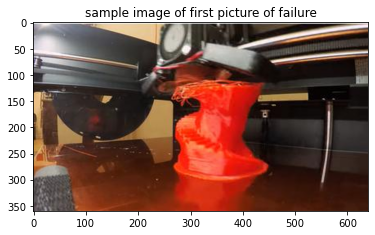

In [8]:
plt.imshow(img_arr[22].astype(np.uint8))
plt.title('sample image of first picture of failure')
plt.show()

we have 28 images, take batchs of 10 images and create a image tensor, in greyscale

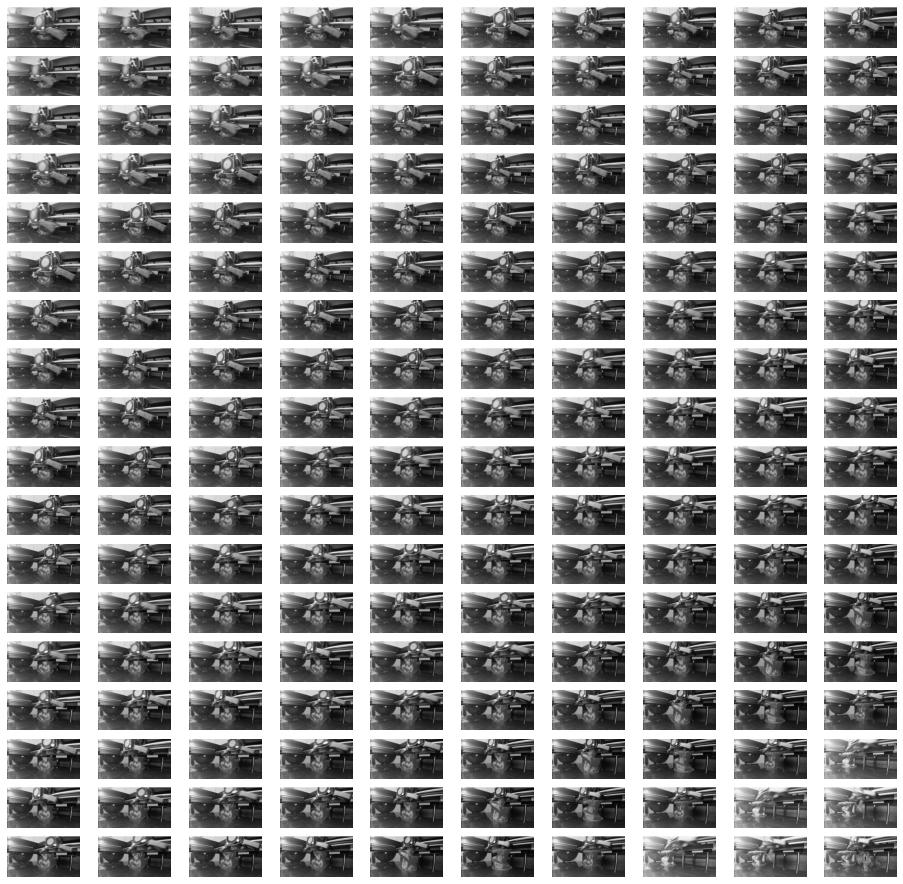

In [10]:
img_tens = np.zeros((l-10,10,360,640))

fig, axarr = plt.subplots(l-10,10, figsize=(16, 16))
#fig.tight_layout() 

for i in range(l-10):
    img_tens[i] = color.rgb2gray(img_arr[i:i+10])
    
    for j in range(10):
        axarr[i,j].imshow(img_tens[i][j].astype(np.uint8), cmap='gray')
        axarr[i,j].axis('off')


In [11]:
img_tens.shape

(18, 10, 360, 640)

#the prints started failing at picture 23, so we will give the values of y to be the ratio of failed to successfl pictures:

In [12]:
y = np.zeros(18)
ratio = 0 
for i in range(18):
    if i > 12:
        ratio += 1
    y[i] = ratio/10

In [13]:
y

array([0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.1, 0.2, 0.3, 0.4, 0.5])

Tucker Decomposition

In [14]:
X = img_tens

#t_pred = []
t_mse = []
for rank in range (1,6):
    estimator = TuckerRegressor(weight_ranks=[rank, rank, rank], tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)
    estimator.fit(X, y)
    
    #t_pred.append(estimator.predict(test))
    
    t_mse.append(mean_squared_error(y, estimator.predict(X)))



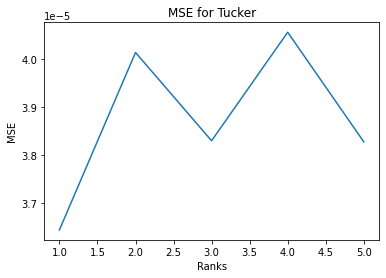

In [15]:
plt.plot(range(1,6), t_mse)
plt.title('MSE for Tucker')
plt.xlabel('Ranks')
plt.ylabel('MSE')
plt.show()

rank 4 mse best

In [16]:
estimator = TuckerRegressor(weight_ranks=[4, 4, 4], tol=10e-7, n_iter_max=100, reg_W=1, verbose=0)

In [17]:
estimator

In [18]:
estimator.predict(X)           

AttributeError: 'TuckerRegressor' object has no attribute 'vec_W_'

Anomoly detection

Change detection